In [36]:
import warnings
warnings.filterwarnings("ignore")

from keras import Sequential, Input
from keras.layers import Dense

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

# Carga datos de entrenamiento

In [2]:
df_train = pd.read_csv("customer_churn_dataset-training-master.csv")
df_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
# Hay un valor nulo y lo eliminamos
df_train.dropna(inplace=True)

In [5]:
# Eliminamos la columna "CustomerID"
df_train.drop("CustomerID", axis=1, inplace=True)

In [6]:
# Conevertimos la columna tipo "Churn" de float a int
df_train["Churn"] = df_train["Churn"].astype(int)

In [7]:
# Dummies

df_train = pd.get_dummies(df_train, columns=["Gender", "Subscription Type", "Contract Length"])

In [8]:
df_train

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1,1,0,0,0,1,1,0,0
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1,1,0,1,0,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1,1,0,1,0,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,1,0,1,0,0,1,0,1,0
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,54.0,15.0,1.0,3.0,716.38,8.0,0,0,1,0,1,0,1,0,0
440829,25.0,8.0,13.0,1.0,20.0,745.38,2.0,0,1,0,0,1,0,1,0,0
440830,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0,0,1,0,0,1,0,0,1
440831,28.0,55.0,14.0,2.0,0.0,602.55,2.0,0,0,1,0,0,1,0,0,1


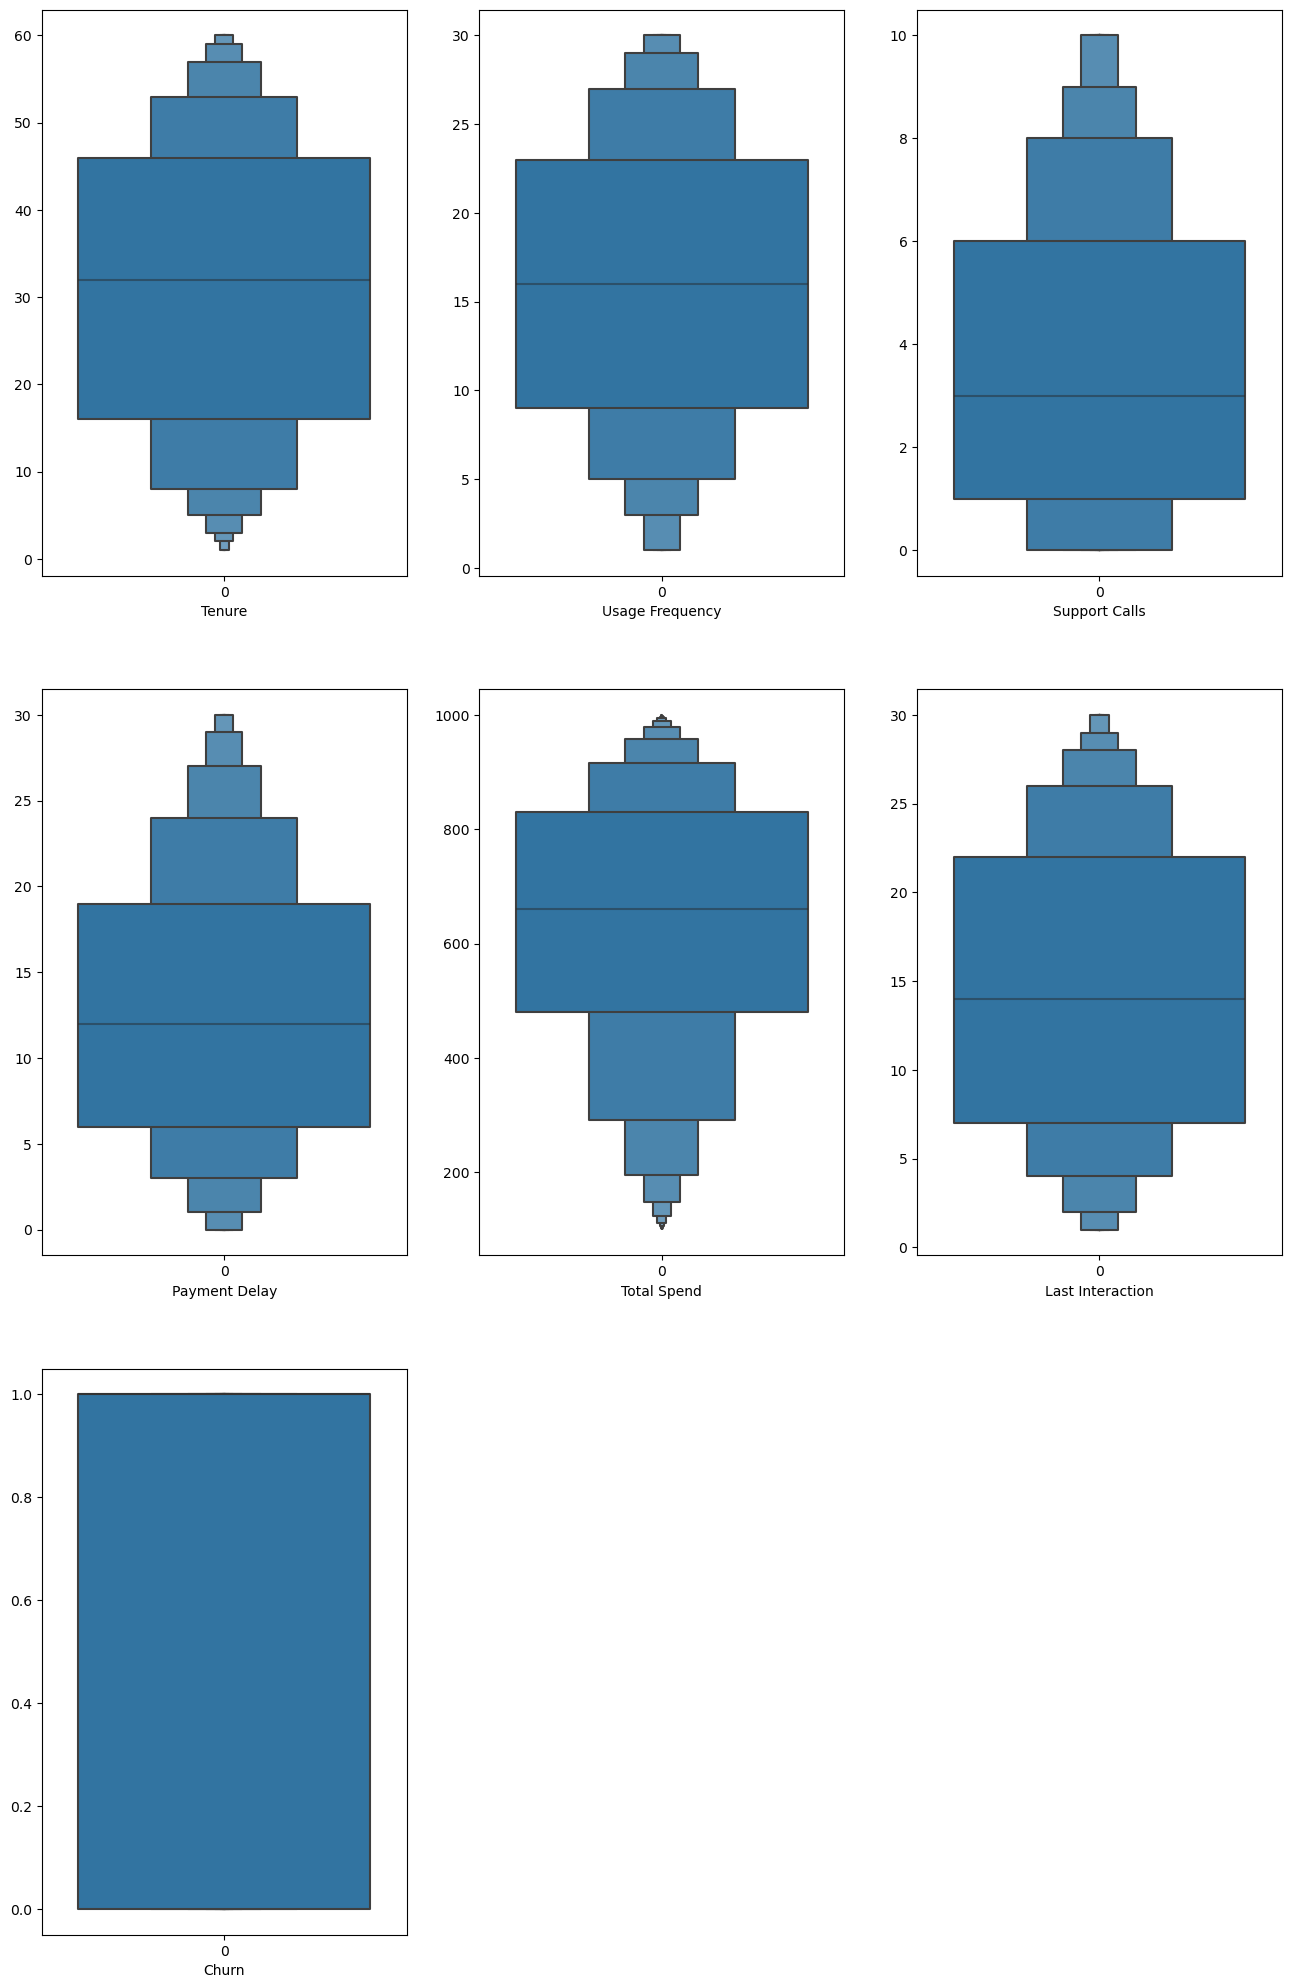

In [9]:
# Comprobamos si hay valores atipicos en el df_train
plt.figure(figsize=(16,25))
plt.subplot(3,3,1)

for n in range(1, 8):
    plt.subplot(3,3,n)
    sns.boxenplot(df_train.iloc[:,n])
    plt.xlabel(df_train.columns[n])

# Carga datos de testeo

In [10]:
df_test = pd.read_csv("customer_churn_dataset-testing-master.csv")
df_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [12]:
# Eliminamos la columna "CustomerID"
df_test.drop("CustomerID", axis=1, inplace=True)

In [13]:
# Dummies

df_test = pd.get_dummies(df_test, columns=["Gender", "Subscription Type", "Contract Length"])
df_test

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,22,25,14,4,27,598,9,1,1,0,1,0,0,0,1,0
1,41,28,28,7,13,584,20,0,1,0,0,0,1,0,1,0
2,47,27,10,2,29,757,21,0,0,1,0,1,0,1,0,0
3,35,9,12,5,17,232,18,0,0,1,0,1,0,0,0,1
4,53,58,24,9,2,533,18,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,33,12,6,21,947,14,1,1,0,1,0,0,0,0,1
64370,37,6,1,5,22,923,9,1,0,1,0,0,1,1,0,0
64371,25,39,14,8,30,327,20,1,0,1,0,1,0,0,1,0
64372,50,18,19,7,22,540,13,1,1,0,0,0,1,0,1,0


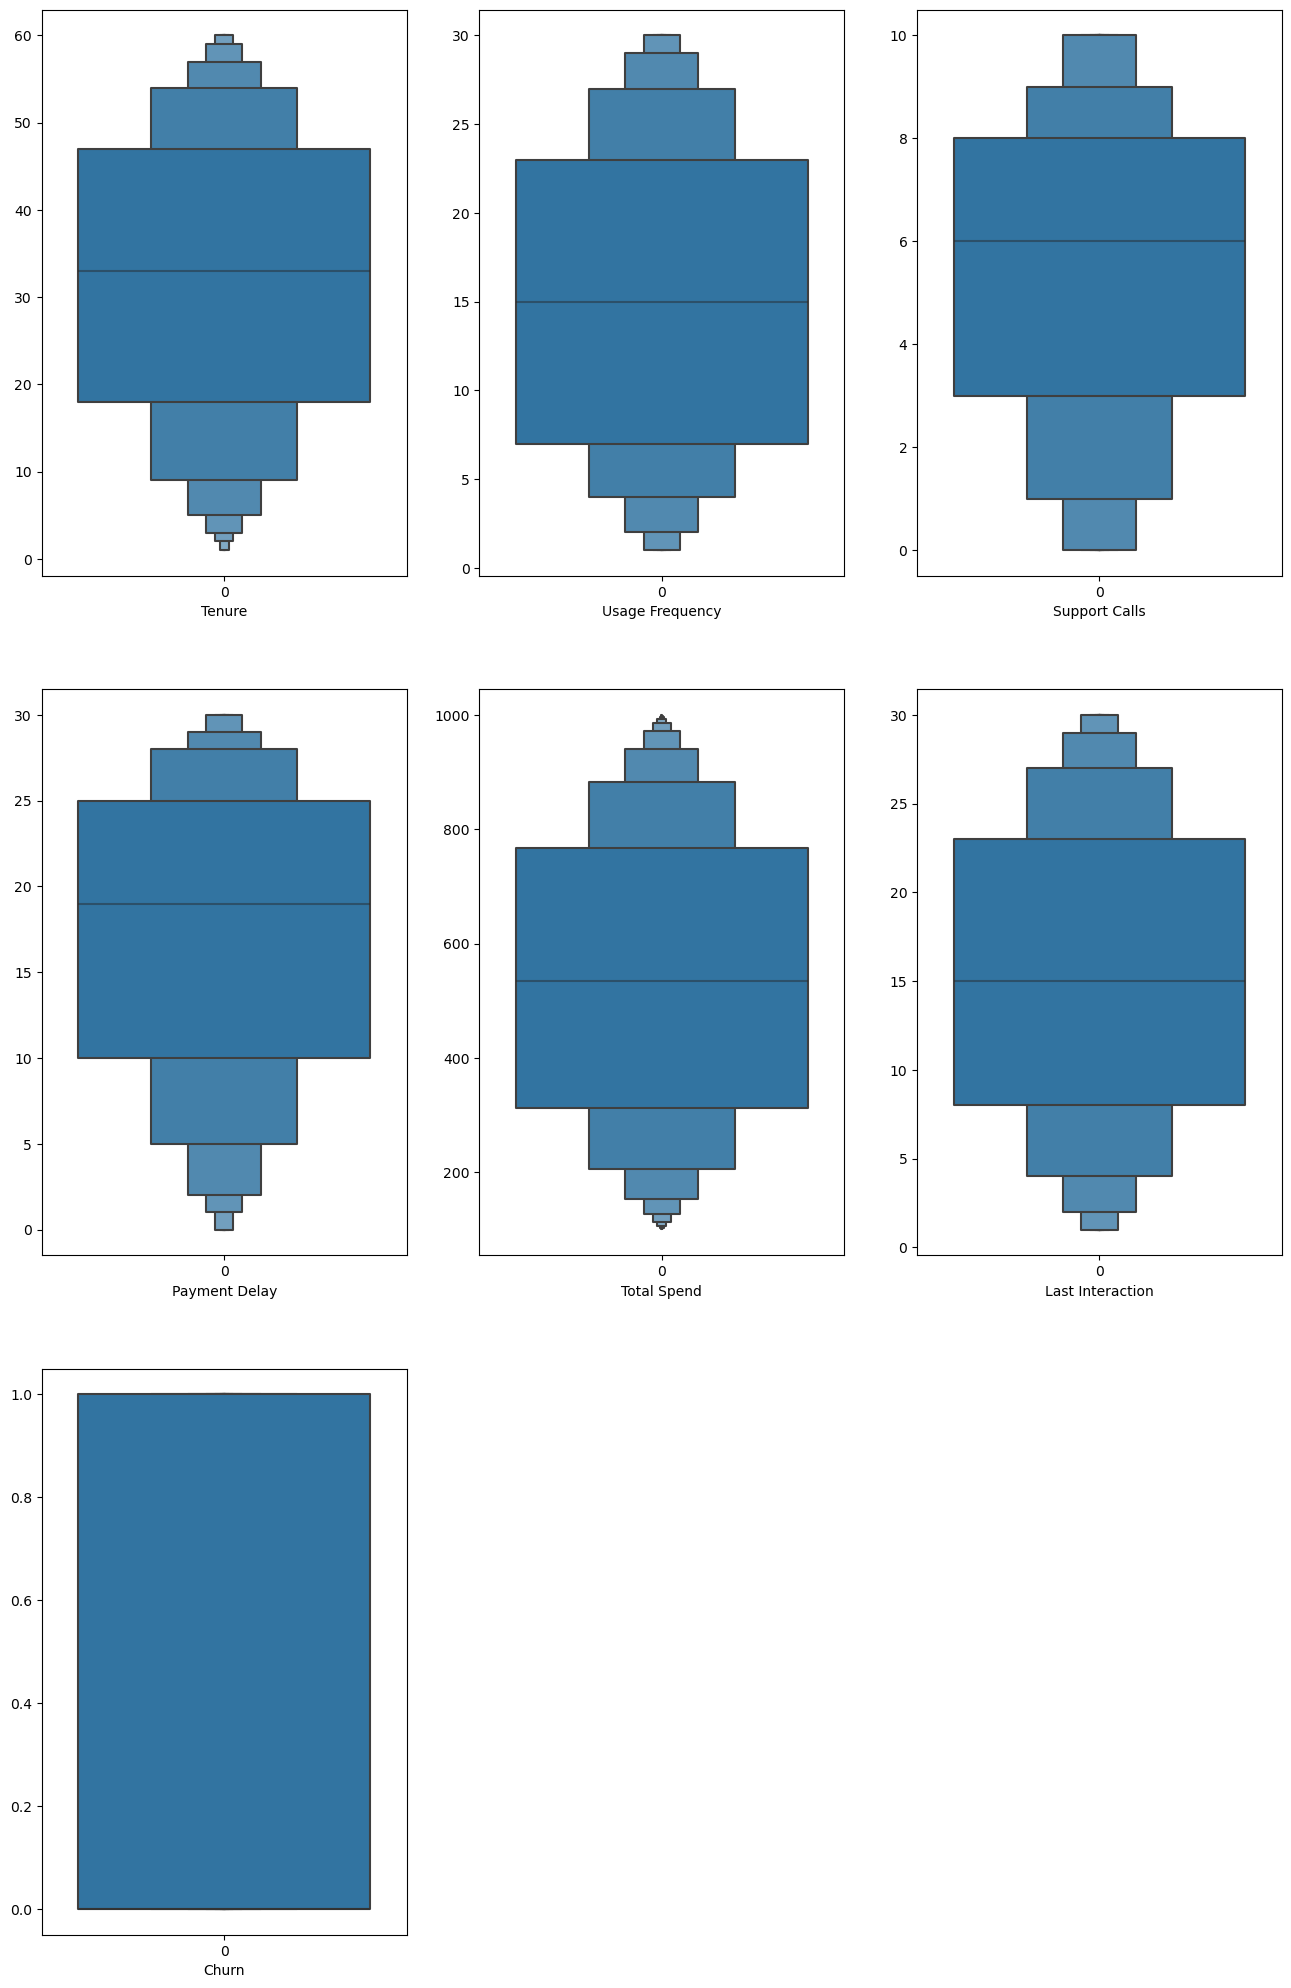

In [14]:
# Comprobamos si hay valores atipicos en el df_test
plt.figure(figsize=(16,25))
plt.subplot(3,3,1)

for n in range(1, 8):
    plt.subplot(3,3,n)
    sns.boxenplot(df_test.iloc[:,n])
    plt.xlabel(df_test.columns[n])

## Division de los datos

In [15]:
x_train = df_train.drop("Churn", axis=1)
y_train = df_train["Churn"]

x_test = df_test.drop("Churn", axis=1)
y_test = df_test["Churn"]

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((440832, 15), (440832,), (64374, 15), (64374,))

## Normalizacion de los datos

In [17]:
sc = StandardScaler()

x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_test.columns] = sc.transform(x_test)

## Modelo

In [46]:
model = Sequential()

model.add(Dense(64, activation="relu", input_shape=[x_train.shape[1]]))

model.add(Dense(64, activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(2, activation="softmax"))

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1024      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 9,474
Trainable params: 9,474
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento

In [21]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
12399/12399 [==============================] - 11s 870us/step - loss: 0.0480 - accuracy: 0.9831 - val_loss: 0.0171 - val_accuracy: 0.9962
Epoch 2/5
12399/12399 [==============================] - 11s 863us/step - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 3/5
12399/12399 [==============================] - 11s 875us/step - loss: 0.0169 - accuracy: 0.9941 - val_loss: 0.0084 - val_accuracy: 0.9993
Epoch 4/5
12399/12399 [==============================] - 11s 882us/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0129 - val_accuracy: 0.9975
Epoch 5/5
12399/12399 [==============================] - 11s 880us/step - loss: 0.0112 - accuracy: 0.9961 - val_loss: 0.0267 - val_accuracy: 0.9895


### Evaluacion y prediccion

In [22]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

2012/2012 - 1s - loss: 77.8771 - accuracy: 0.5044 - 1s/epoch - 627us/step

Test accuracy: 0.5043806433677673


In [31]:
y_prob = model.predict(x_test)

2012/2012 [==============================] - 1s 560us/step


In [33]:
y_pred = np.argmax(y_prob, axis=1)

y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374



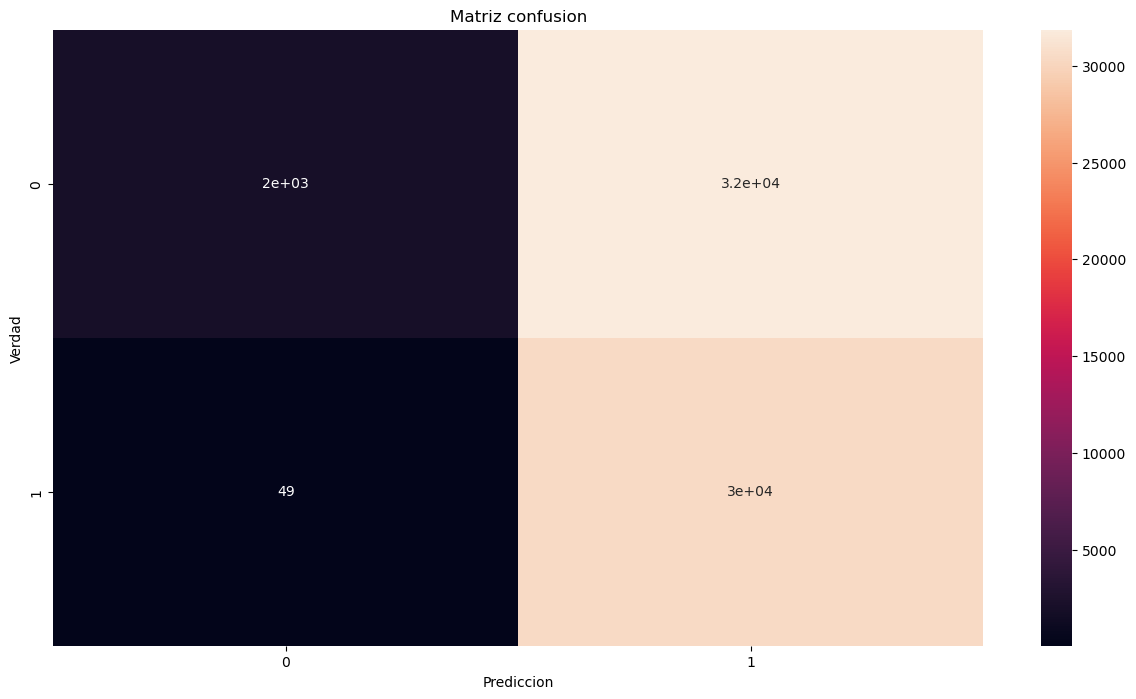

In [35]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Conclusion

Al crear nuestro modelo y entrenarlo nos da una precisión del 99% con el conjunto de validación pero a la hora de predecir los resultados del conjunto de testeo en este caso la precisión baja hasta el 50% por que nuestro modelo en casi los casos predice que el resultado final será igual a 1. El modelo solo arroja como resultado igual a 0 solo 49 veces de los 65000 regisros que hay. 


In [50]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.1)

In [51]:
model.fit(x_train1, y_train1, epochs=5, validation_split=0.1)

Epoch 1/5
11159/11159 [==============================] - 10s 858us/step - loss: 0.0504 - accuracy: 0.9827 - val_loss: 0.0280 - val_accuracy: 0.9913
Epoch 2/5
11159/11159 [==============================] - 10s 868us/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0226 - val_accuracy: 0.9926
Epoch 3/5
11159/11159 [==============================] - 10s 865us/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0175 - val_accuracy: 0.9943
Epoch 4/5
11159/11159 [==============================] - 10s 870us/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0145 - val_accuracy: 0.9956
Epoch 5/5
11159/11159 [==============================] - 10s 871us/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0216 - val_accuracy: 0.9927


In [52]:
y_prob1 = model.predict(x_test1)

1378/1378 [==============================] - 1s 588us/step


In [53]:
y_pred1 = np.argmax(y_prob1, axis=1)

In [54]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19044
           1       0.99      0.99      0.99     25040

    accuracy                           0.99     44084
   macro avg       0.99      0.99      0.99     44084
weighted avg       0.99      0.99      0.99     44084



## Conclusion #2

Si testeamos los datos solo teniendo en cuenta nuestro dataset train, el cual dividimos en train y test para poder probar el modelo predictivo, podemos alzcanzar una precisión total de un 99%. En este caso vemos como nuestro dataset test tiene errores o falta de datos y es por ello que al tratar de predecir sus resultados obtenemos unos resultados tan malos.